### Task 1 - Data Analysis and Preprocessing

This notebook focuses on the initial steps of preparing the dataset for fraud detection analysis. It involves handling missing values by either imputing or dropping them, followed by thorough data cleaning, including removing duplicates and correcting data types. The notebook also conducts Exploratory Data Analysis (EDA) through univariate and bivariate analyses to gain insights into the dataset. Afterward, the datasets will be merged for geolocation analysis by converting IP addresses into integer format. Feature engineering is applied to create new features such as transaction frequency, velocity, and time-based features. Lastly, the data will be normalized, scaled, and categorical features encoded, ensuring the dataset is ready for machine learning models. 

##### 1. Handle missing values

In [153]:
# Load the data
import pandas as pd
df = pd.read_csv("../notebooks/Data/Fraud_Data.csv")
print("Fraud Data head preview: ")
print(df.head())

df_2 = pd.read_csv("../notebooks/Data/creditcard.csv")
print("Credit card data head preview: ")
print(df_2.head())

df_3 = pd.read_csv("../notebooks/Data/IpAddress_to_Country.csv")
print("Ip Address to country data head preview: ")
print(df_3.head())

Fraud Data head preview: 
   Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             3             3             3             3             3   
4             4             4             4             4             4   

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  user_id  \
0             0             0             0           0    22058   
1             1             1             1           1   333320   
2             2             2             2           2     1359   
3             3             3             3           3   150084   
4             4             4             4           4   221365   

           signup_time        purchase_time  purchase_value      device_id  \
0  2015-02-24 22:55:49  2015-04-18 0

In [154]:
# Proceed to handling the missing values in all three data frames
import pandas as pd


# Show missing values before handling df
print("Missing values before handling Fraud data:\n", df.isnull().sum())

# 1. Fill missing values in numerical columns with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# 2. Fill missing values in categorical columns ('source', 'browser', 'sex') with the mode
categorical_cols = ['source', 'browser', 'sex']
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# 3. Drop rows where 'device_id' has missing values
df = df.dropna(subset=['device_id'])

# Show missing values after handling
print("\nMissing values after handling Fraud data:\n", df.isnull().sum())




# Show missing values before handling df_2
print("Missing values before handling credit card dataset:\n", df_2.isnull().sum())

# 1. Fill missing values in numerical columns with the median value
numerical_colum = df_2.select_dtypes(include=['float','int64']).columns
df_2[numerical_colum] = df_2[numerical_colum].fillna(df_2[numerical_colum].median())

# Show missing values after handling
print("\nMissing values after handling credit card dataset:\n", df_2.isnull().sum())



# Show missing values before handling df_3
print("Missing values before handling Ip Address datastet:\n", df_3.isnull().sum())

# 1 Fill missing values in numerical columns with the median value
num_col = df_3.select_dtypes(include=['float','int64']).columns
df_3[num_col]= df_3[num_col].fillna(df_3[num_col].median())

# 2. Fill missing values in categorical columns ('source', 'browser', 'sex') with the mode
categorical_cols = ['country']
df_3[categorical_cols] = df_3[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Show missing values after handling
print("\nMissing values after handling IpAddress dataset:\n", df_3.isnull().sum())



Missing values before handling Fraud data:
 Unnamed: 0.8      0
Unnamed: 0.7      0
Unnamed: 0.6      0
Unnamed: 0.5      0
Unnamed: 0.4      0
Unnamed: 0.3      0
Unnamed: 0.2      0
Unnamed: 0.1      0
Unnamed: 0        0
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Missing values after handling Fraud data:
 Unnamed: 0.8      0
Unnamed: 0.7      0
Unnamed: 0.6      0
Unnamed: 0.5      0
Unnamed: 0.4      0
Unnamed: 0.3      0
Unnamed: 0.2      0
Unnamed: 0.1      0
Unnamed: 0        0
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Missing values before handling credit card dataset:
 Unnamed: 0.8    0
Unnamed: 0.7   

In [155]:
# Save the cleaned data back to the .csv files
df.to_csv("../notebooks/Data/Fraud_Data.csv")
df_2.to_csv("../notebooks/Data/creditcard.csv")
df_3.to_csv("../notebooks/Data/IpAddress_to_Country.csv")

#### 2. Data cleaning
After handling the missing values we proceed to data cleaning where we will conduct the removal of duplicates and creation of the correct data types.

In [156]:
# Function to clean data: Remove duplicates and correct data types
def clean_data(df):
    # Remove duplicates
    df_cleaned = df.drop_duplicates()
    return df_cleaned

# Apply cleaning to each data frame

# Clean df
df_cleaned = clean_data(df)

# Clean df_2
df_2_cleaned = clean_data(df_2)

# Clean df_3
df_3_cleaned = clean_data(df_3)

# Print info about the cleaned data frames
print("df cleaned:")
print(df_cleaned.info())

print("\ndf_2 cleaned:")
print(df_2_cleaned.info())

print("\ndf_3 cleaned:")
print(df_3_cleaned.info())

df cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0.8    151112 non-null  int64  
 1   Unnamed: 0.7    151112 non-null  int64  
 2   Unnamed: 0.6    151112 non-null  int64  
 3   Unnamed: 0.5    151112 non-null  int64  
 4   Unnamed: 0.4    151112 non-null  int64  
 5   Unnamed: 0.3    151112 non-null  int64  
 6   Unnamed: 0.2    151112 non-null  int64  
 7   Unnamed: 0.1    151112 non-null  int64  
 8   Unnamed: 0      151112 non-null  int64  
 9   user_id         151112 non-null  int64  
 10  signup_time     151112 non-null  object 
 11  purchase_time   151112 non-null  object 
 12  purchase_value  151112 non-null  int64  
 13  device_id       151112 non-null  object 
 14  source          151112 non-null  object 
 15  browser         151112 non-null  object 
 16  sex             151112 non-null  object 
 17

#### 3. EXploratory data analysis(EDA)
In this stage we are going to conduct a univariate and bivariate analysis.
We are going to start our analysis with the Fraud dataset:

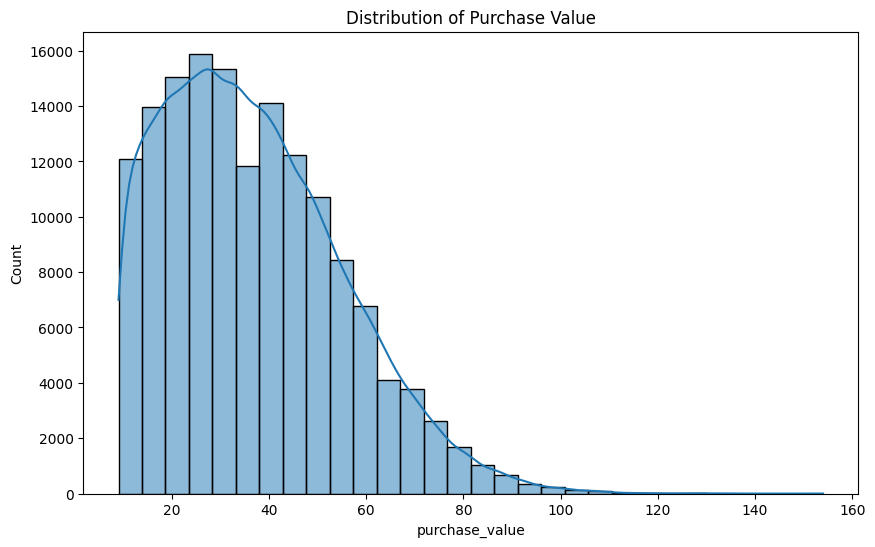

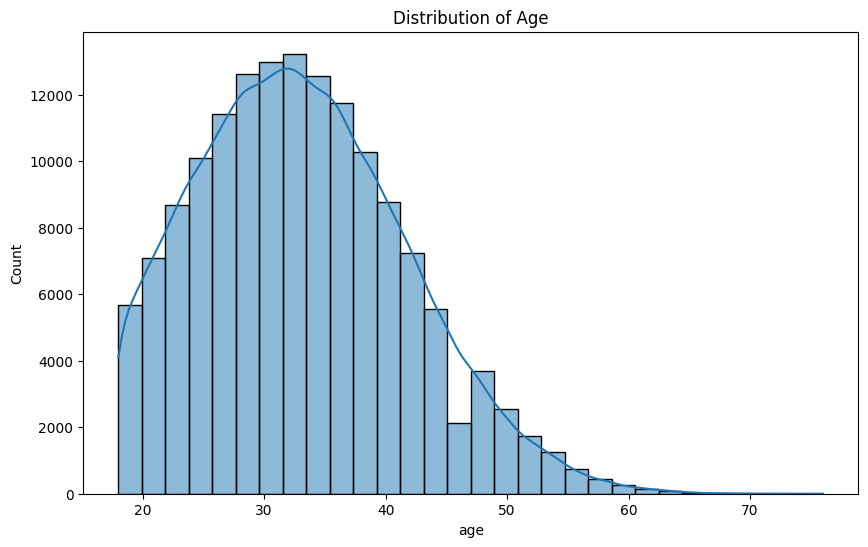

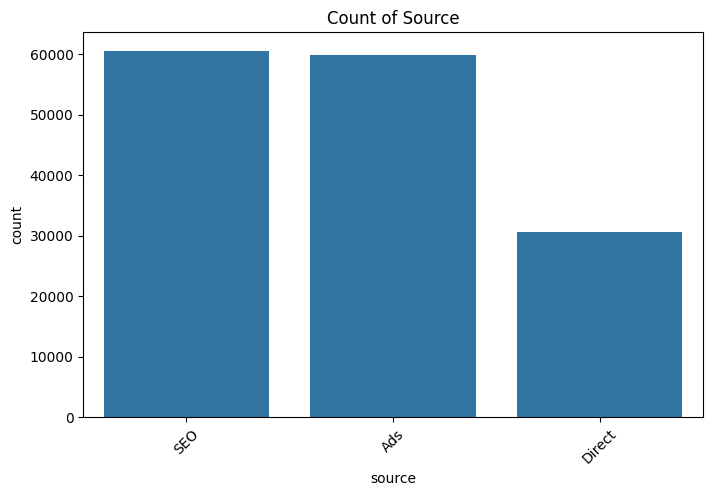

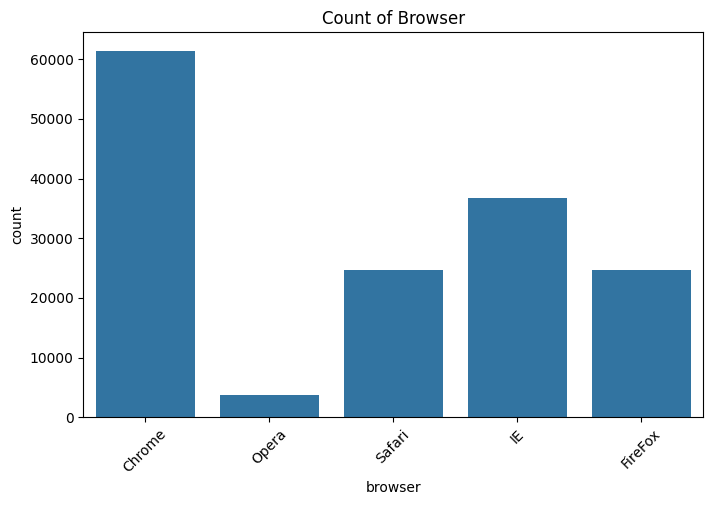

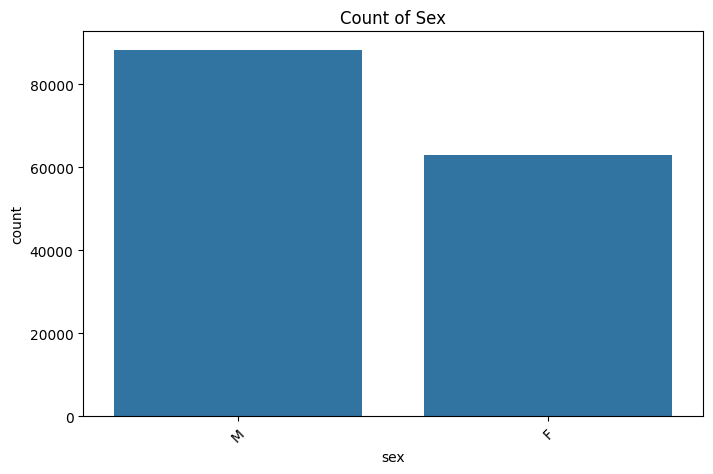

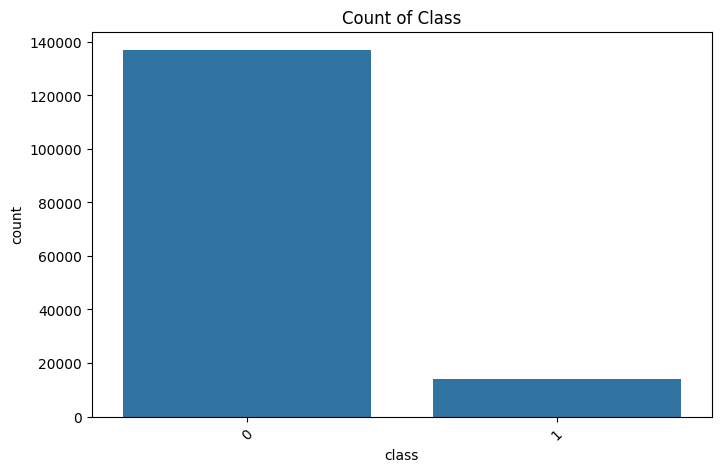

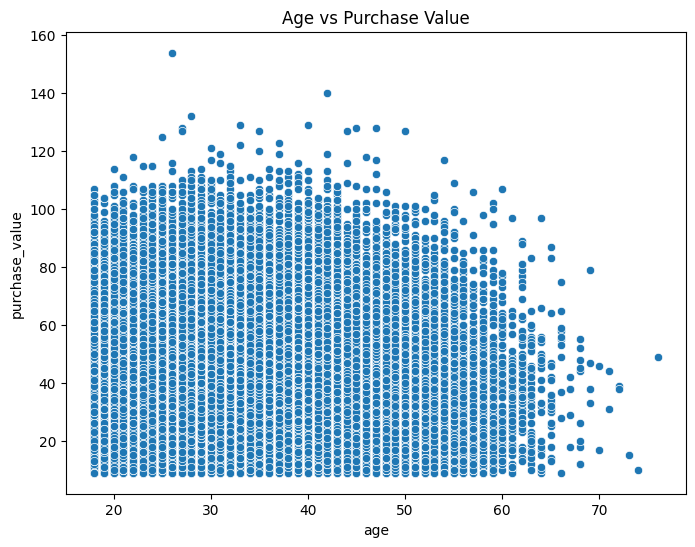

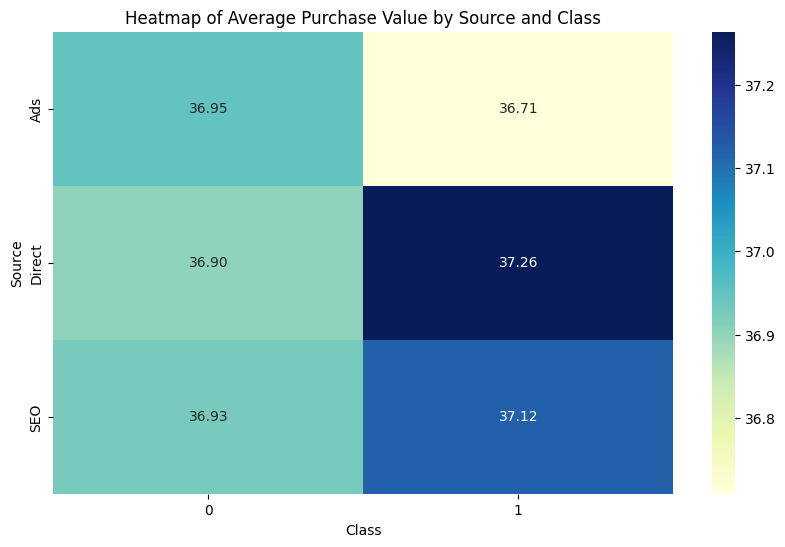

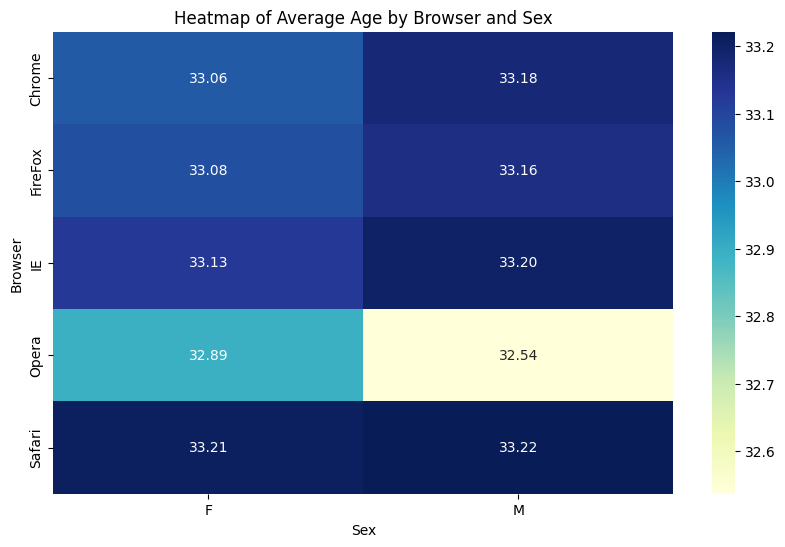

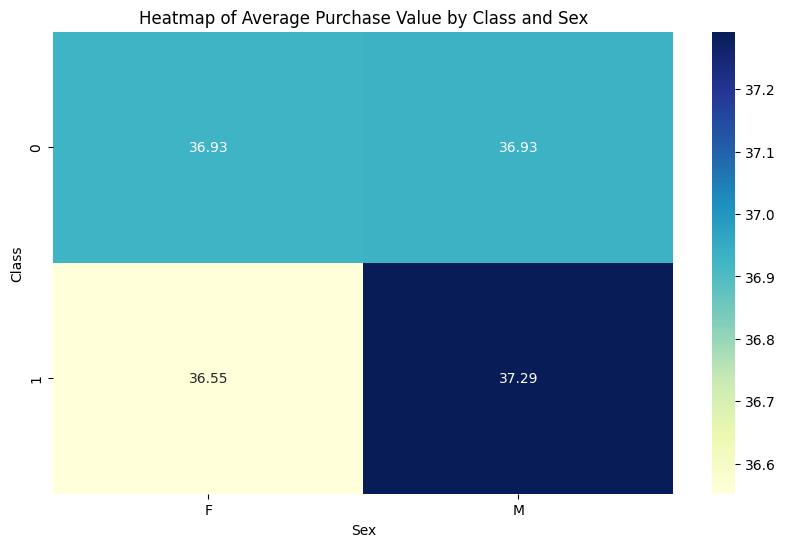

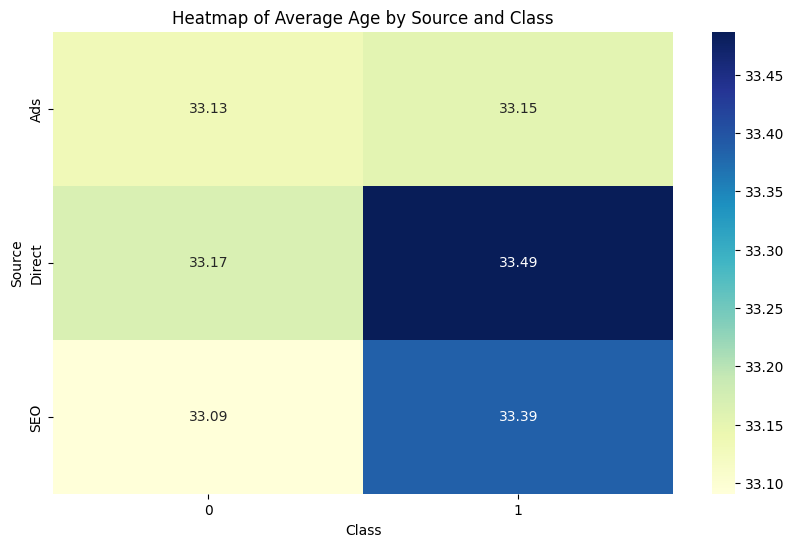

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is already loaded
# Univariate Analysis - Numerical Columns
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['purchase_value'], kde=True, bins=30)
plt.title('Distribution of Purchase Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

# Univariate Analysis - Categorical Columns
plt.figure(figsize=(8, 5))
sns.countplot(x='source', data=df_cleaned)
plt.title('Count of Source')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='browser', data=df_cleaned)
plt.title('Count of Browser')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=df_cleaned)
plt.title('Count of Sex')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df_cleaned)
plt.title('Count of Class')
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis - Numerical vs Numerical
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='purchase_value', data=df_cleaned)
plt.title('Age vs Purchase Value')
plt.show()

# Bivariate Analysis - Categorical vs Numerical using Heatmaps
# Create a pivot table for heatmap
heatmap_data_value = df_cleaned.groupby(['source', 'class'])['purchase_value'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_value, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Average Purchase Value by Source and Class')
plt.xlabel('Class')
plt.ylabel('Source')
plt.show()

heatmap_data_age = df_cleaned.groupby(['browser', 'sex'])['age'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_age, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Average Age by Browser and Sex')
plt.xlabel('Sex')
plt.ylabel('Browser')
plt.show()

heatmap_data_purchase_age = df_cleaned.groupby(['class', 'sex'])['purchase_value'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_purchase_age, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Average Purchase Value by Class and Sex')
plt.xlabel('Sex')
plt.ylabel('Class')
plt.show()

# Additional heatmap for age by source
heatmap_data_age_source = df_cleaned.groupby(['source', 'class'])['age'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_age_source, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Average Age by Source and Class')
plt.xlabel('Class')
plt.ylabel('Source')
plt.show()


#### 4. Merge datasets for Geolocation Analysis
In this stage we are going to prepare two datasets by merging and converting features for our final analysis

In [158]:
import pandas as pd

# Convert the 'ip_address' column from float to integer by removing the dot
df_cleaned['ip_address'] = df_cleaned['ip_address'].apply(lambda x: int(str(int(x)).replace('.', '')))

# Display the head of df_cleaned after conversion
print(df_cleaned.head())


   Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             3             3             3             3             3   
4             4             4             4             4             4   

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  user_id  \
0             0             0             0           0    22058   
1             1             1             1           1   333320   
2             2             2             2           2     1359   
3             3             3             3           3   150084   
4             4             4             4           4   221365   

           signup_time        purchase_time  purchase_value      device_id  \
0  2015-02-24 22:55:49  2015-04-18 02:47:11              34  Q

In [159]:
# Convert 'lower_bound_ip_address' from float to integer
df_3_cleaned['lower_bound_ip_address'] = df_3_cleaned['lower_bound_ip_address'].astype(int)

# Display the updated DataFrame to verify the change
print(df_3_cleaned.head())

   Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             3             3             3             3             3   
4             4             4             4             4             4   

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0             0             0             0           0   
1             1             1             1           1   
2             2             2             2           2   
3             3             3             3           3   
4             4             4             4           4   

   lower_bound_ip_address  upper_bound_ip_address    country  
0                16777216                16777471  Australia  
1                16777472                16777727      China  
2    

In [160]:
import pandas as pd

# Ensure df_3_cleaned is sorted by 'lower_bound_ip_address'
df_3_cleaned_sorted = df_3_cleaned.sort_values('lower_bound_ip_address')

# Perform an asof merge, matching df_cleaned's ip_address with the nearest lower_bound_ip_address
df_merged = pd.merge_asof(df_cleaned.sort_values('ip_address'),
                          df_3_cleaned_sorted,
                          left_on='ip_address',
                          right_on='lower_bound_ip_address',
                          direction='backward')

# Now filter the rows where ip_address is between 'lower_bound_ip_address' and 'upper_bound_ip_address'
df_merged = df_merged[(df_merged['ip_address'] >= df_merged['lower_bound_ip_address']) &
                      (df_merged['ip_address'] <= df_merged['upper_bound_ip_address'])]

# Drop any unnecessary columns and keep the 'country' column
df_merged = df_merged[['ip_address', 'country']]

# Merge the 'country' column back into df_cleaned
df_cleaned = df_cleaned.merge(df_merged, on='ip_address', how='left')

# Display the updated df_cleaned DataFrame
print(df_cleaned.head())


   Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             2             2             2             2             2   
4             2             2             2             2             2   

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  user_id  ...  \
0             0             0             0           0    22058  ...   
1             1             1             1           1   333320  ...   
2             2             2             2           2     1359  ...   
3             2             2             2           2     1359  ...   
4             2             2             2           2     1359  ...   

         purchase_time purchase_value      device_id source browser sex age  \
0  2015-04-18 02:47:11         

In [161]:
print(df_cleaned.shape)

(231082, 21)


In [162]:
# Calculate the percentage of empty (None or NaN) values in the 'country' column
empty_percentage = df_cleaned['country'].isnull().mean() * 100

# Display the percentage of empty values
print(f"Percentage of empty or None values in the 'country' column: {empty_percentage:.2f}%")

Percentage of empty or None values in the 'country' column: 9.51%


In [163]:
# We are going to clean rows with missing values in the Country column
# Drop rows where 'country' column has missing values
df_cleaned = df_cleaned.dropna(subset=['country'])

# Display the updated DataFrame
print("Rows with missing values in 'country' column have been dropped.")
print(df_cleaned.head())
print(df_cleaned.shape)

Rows with missing values in 'country' column have been dropped.
   Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             2             2             2             2             2   
4             2             2             2             2             2   

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  user_id  ...  \
0             0             0             0           0    22058  ...   
1             1             1             1           1   333320  ...   
2             2             2             2           2     1359  ...   
3             2             2             2           2     1359  ...   
4             2             2             2           2     1359  ...   

         purchase_time purchase_value      dev

In [164]:
print(df_cleaned.columns.tolist())

['Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class', 'country']


##### 5. Feature engineering
We are going to create new features out of the existing features, which are going to help us in our model building in the next stages. The variables to be created are:     
**Transaction frequency and velocity for Fraud_Data.csv**  
**Time-Based features for Fraud_Data.csv**  
A. hour_of_day  
B. day_of_week

In [165]:
import pandas as pd

# Ensure that 'purchase_time' is in datetime format
df_cleaned['purchase_time'] = pd.to_datetime(df_cleaned['purchase_time'])

# 1. Create 'hour_of_day' from the 'purchase_time' column
df_cleaned['hour_of_day'] = df_cleaned['purchase_time'].dt.hour

# 2. Create 'day_of_week' from the 'purchase_time' column (1 = Monday, 7 = Sunday)
df_cleaned['day_of_week'] = df_cleaned['purchase_time'].dt.dayofweek + 1  # +1 to make Monday = 1 and Sunday = 7

# 3. Transaction frequency and velocity
# Assuming transaction frequency is the count of purchases per user
df_cleaned['transaction_frequency'] = df_cleaned.groupby('user_id')['purchase_time'].transform('count')


# Display the first few rows of the updated DataFrame with the new features
print(df_cleaned[['user_id', 'purchase_time', 'hour_of_day', 'day_of_week', 'transaction_frequency']].head())

   user_id       purchase_time  hour_of_day  day_of_week  \
0    22058 2015-04-18 02:47:11            2            6   
1   333320 2015-06-08 01:38:54            1            1   
2     1359 2015-01-01 18:52:45           18            4   
3     1359 2015-01-01 18:52:45           18            4   
4     1359 2015-01-01 18:52:45           18            4   

   transaction_frequency  
0                      1  
1                      1  
2                     12  
3                     12  
4                     12  


In [166]:
print(df_cleaned.columns.tolist())

['Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class', 'country', 'hour_of_day', 'day_of_week', 'transaction_frequency']


#### 6. Normalization and Scaling
In this stage we are going to normalize the values we have created so as to make them suitable for our model building.

In [167]:
print(df_cleaned.head(10))

   Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             2             2             2             2             2   
4             2             2             2             2             2   
5             2             2             2             2             2   
6             2             2             2             2             2   
7             2             2             2             2             2   
8             2             2             2             2             2   
9             2             2             2             2             2   

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  user_id  ... source  \
0             0             0             0           0    22058  ...    SEO   
1             

In [168]:
print(df_cleaned.isnull().sum())

Unnamed: 0.8             0
Unnamed: 0.7             0
Unnamed: 0.6             0
Unnamed: 0.5             0
Unnamed: 0.4             0
Unnamed: 0.3             0
Unnamed: 0.2             0
Unnamed: 0.1             0
Unnamed: 0               0
user_id                  0
signup_time              0
purchase_time            0
purchase_value           0
device_id                0
source                   0
browser                  0
sex                      0
age                      0
ip_address               0
class                    0
country                  0
hour_of_day              0
day_of_week              0
transaction_frequency    0
dtype: int64


Before normalization we are going to remove outliers from selected columns.

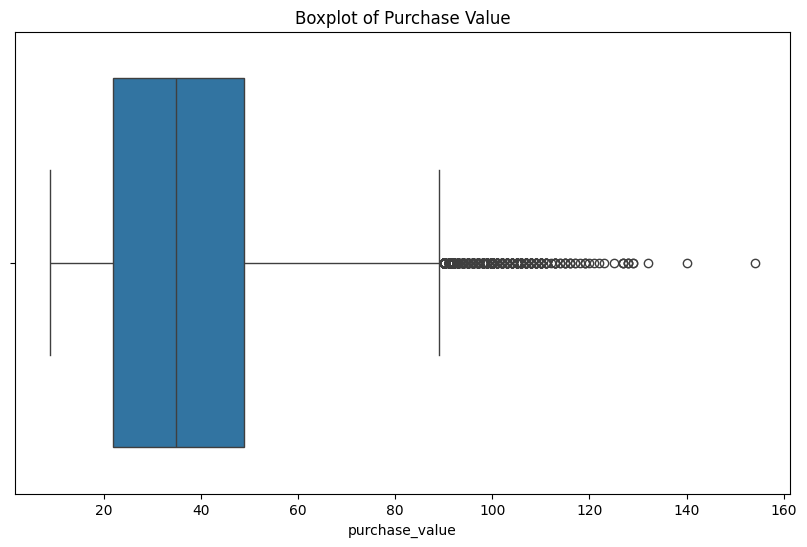

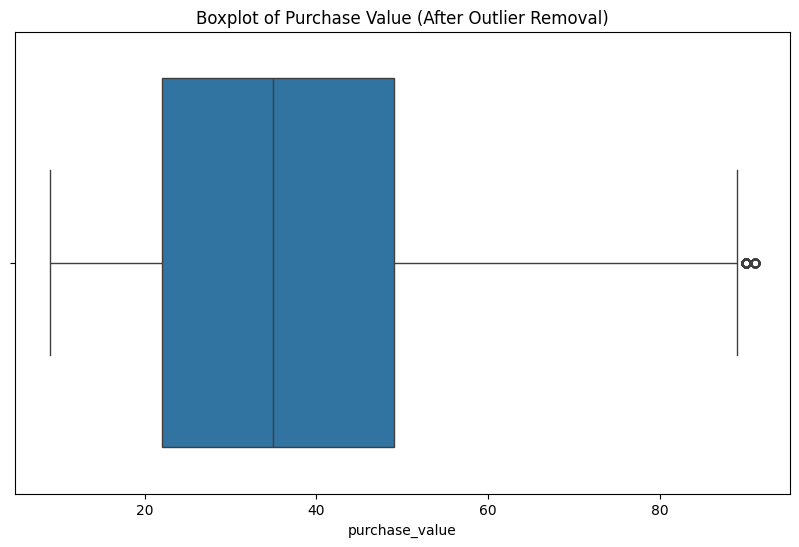

   Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             2             2             2             2             2   
4             2             2             2             2             2   

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  user_id  ... source  \
0             0             0             0           0    22058  ...    SEO   
1             1             1             1           1   333320  ...    Ads   
2             2             2             2           2     1359  ...    SEO   
3             2             2             2           2     1359  ...    SEO   
4             2             2             2           2     1359  ...    SEO   

  browser  sex age  ip_address class        country  hour_of_day  da

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Visualize the outliers using boxplot

# Boxplot for 'purchase_value'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['purchase_value'])
plt.title('Boxplot of Purchase Value')
plt.show()

# 2. Remove outliers using the Z-score method

# Function to calculate Z-scores and filter out outliers
def remove_outliers_zscore(df, column, threshold=3):
    # Calculate the Z-scores for the column
    z_scores = np.abs(stats.zscore(df[column]))
    
    # Find the number of outliers before removal
    num_outliers_before = np.sum(z_scores > threshold)
    
    # Filter the DataFrame to remove outliers (keep rows where Z-score is below the threshold)
    df_no_outliers = df[z_scores < threshold]
    
    # Find the number of outliers after removal (should be 0)
    num_outliers_after = np.sum(np.abs(stats.zscore(df_no_outliers[column])) > threshold)
    
    return df_no_outliers, num_outliers_before, num_outliers_after



# Remove outliers for 'purchase_value'
df_cleaned, num_outliers_purchase_before, num_outliers_purchase_after = remove_outliers_zscore(df_cleaned, 'purchase_value')

# 3. Show the results after outliers are removed

# Display boxplots after removing outliers


plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['purchase_value'])
plt.title('Boxplot of Purchase Value (After Outlier Removal)')
plt.show()

# Display the updated DataFrame with the results
print(df_cleaned.head())

# Show the number of outliers before and after removal
print(f"Number of outliers in 'purchase_value' before removal: {num_outliers_purchase_before}")
print(f"Number of outliers in 'purchase_value' after removal: {num_outliers_purchase_after}")

# Optionally, drop the temporary log_velocity column if it's no longer needed
# df_cleaned.drop(columns=['log_velocity'], inplace=True)

In [170]:
# Now we proceed witht he normalization
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize 'purchase_value' and 'velocity' columns
df_cleaned['normalized_purchase'] = scaler.fit_transform(df_cleaned[['purchase_value']])

# Display the first few rows of the updated DataFrame
print(df_cleaned[['purchase_value', 'normalized_purchase']].head())


   purchase_value  normalized_purchase
0              34             0.304878
1              16             0.085366
2              15             0.073171
3              15             0.073171
4              15             0.073171


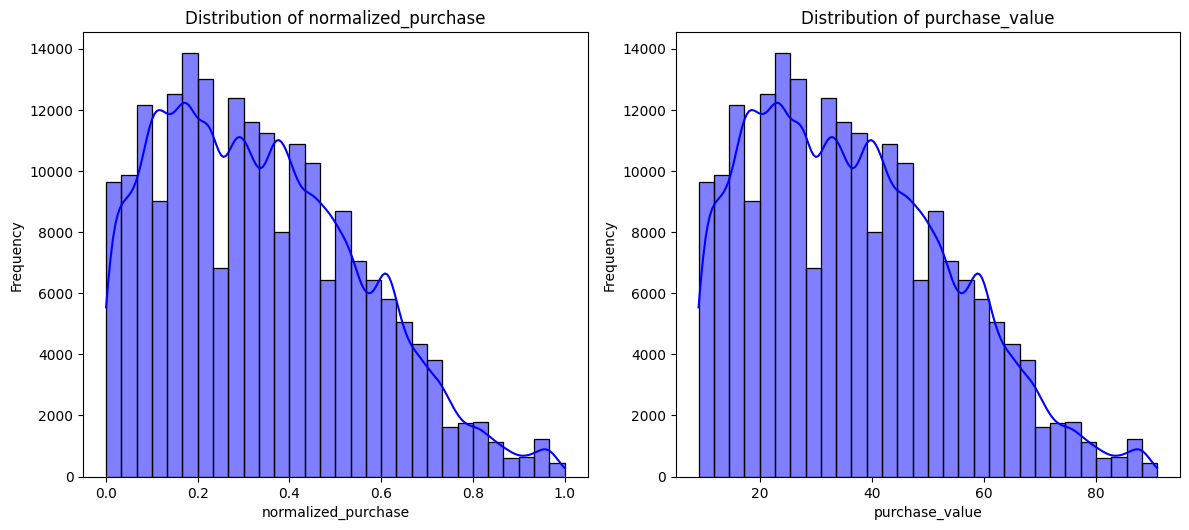

In [171]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns_to_plot = ['normalized_purchase', 'purchase_value']

# Set up the figure size
plt.figure(figsize=(12, 10))

# Loop through each column and plot its distribution
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid for the plots
    
    # Plot the distribution using Seaborn
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='blue')
    
    # Add title and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


#### 7.Encode Categorical Features

Encoding of the column sex 1 for Male and 0 for Female

In [172]:
import pandas as pd

# Sample df_cleaned DataFrame for demonstration
# df_cleaned = pd.DataFrame({'sex': ['M', 'F', 'M', 'F', 'M']})

# Convert the 'sex' column to a categorical type
df_cleaned['sex'] = df_cleaned['sex'].astype('category')

# Use rename_categories to perform one-hot encoding
df_cleaned['sex'] = df_cleaned['sex'].cat.rename_categories({'M': 1, 'F': 0})

# Convert the categorical column back to integers for further processing if needed
df_cleaned['sex'] = df_cleaned['sex'].astype(int)

# Display the updated DataFrame
print(df_cleaned.head())

   Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  \
0             0             0             0             0             0   
1             1             1             1             1             1   
2             2             2             2             2             2   
3             2             2             2             2             2   
4             2             2             2             2             2   

   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  user_id  ... browser  \
0             0             0             0           0    22058  ...  Chrome   
1             1             1             1           1   333320  ...  Chrome   
2             2             2             2           2     1359  ...   Opera   
3             2             2             2           2     1359  ...   Opera   
4             2             2             2           2     1359  ...   Opera   

  sex  age  ip_address class        country  hour_of_day  day_

In [173]:
df_cleaned.to_csv("../notebooks/Data/df_merged.csv")